In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
mh_df = pd.read_csv('/content/Mental_Health_Dataset/mental_health_dataset.csv')
mh_df.head(5)

,age,gender,employment_status,work_environment,mental_health_history,seeks_treatment,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score,mental_health_risk
0,56,Male,Employed,On-site,Yes,Yes,6,6.2,3,28,17,54,59.7,High
1,46,Female,Student,On-site,No,Yes,10,9.0,4,30,11,85,54.9,High
2,32,Female,Employed,On-site,Yes,No,7,7.7,2,24,7,62,61.3,Medium
3,60,Non-binary,Self-employed,On-site,No,No,4,4.5,4,6,0,95,97.0,Low
4,25,Female,Self-employed,On-site,Yes,Yes,3,5.4,0,24,12,70,69.0,High


In [6]:
# Inspecting the dataset
#
print(mh_df.shape)
mh_df.info()

(10000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     10000 non-null  int64  
 1   gender                  10000 non-null  object 
 2   employment_status       10000 non-null  object 
 3   work_environment        10000 non-null  object 
 4   mental_health_history   10000 non-null  object 
 5   seeks_treatment         10000 non-null  object 
 6   stress_level            10000 non-null  int64  
 7   sleep_hours             10000 non-null  float64
 8   physical_activity_days  10000 non-null  int64  
 9   depression_score        10000 non-null  int64  
 10  anxiety_score           10000 non-null  int64  
 11  social_support_score    10000 non-null  int64  
 12  productivity_score      10000 non-null  float64
 13  mental_health_risk      10000 non-null  object 
dtypes: float64(2), int64(6), ob

## **Observations of the Data Inspection**

> - The dataset has a total of 10,000 row entries with 14 different variables
>
> - No missing values were observed
>
> - The data types for all columns were in their correct format.


In [14]:
# Check for duplicate rows
mh_df.duplicated().sum()


np.int64(0)

In [7]:
# Summary statistics for all variables
#
mh_df.describe(include='all')

,age,gender,employment_status,work_environment,mental_health_history,seeks_treatment,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score,mental_health_risk
count,10000.000000,10000,10000,10000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000
unique,NaN,4,4,3,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,Male,Employed,On-site,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium
freq,NaN,4557,5868,5044,6969,6012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5892
mean,41.557600,NaN,NaN,NaN,NaN,NaN,5.572000,6.473000,3.505700,15.039900,10.56180,50.117700,77.312210,NaN
std,13.749581,NaN,NaN,NaN,NaN,NaN,2.887741,1.473944,2.282737,8.990839,6.32264,29.229278,14.061202,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,1.000000,3.000000,0.000000,0.000000,0.00000,0.000000,42.800000,NaN
25%,30.000000,NaN,NaN,NaN,NaN,NaN,3.000000,5.500000,2.000000,7.000000,5.00000,25.000000,65.800000,NaN
50%,41.500000,NaN,NaN,NaN,NaN,NaN,6.000000,6.500000,4.000000,15.000000,11.00000,50.000000,77.600000,NaN
75%,53.000000,NaN,NaN,NaN,NaN,NaN,8.000000,7.500000,5.000000,23.000000,16.00000,76.000000,89.200000,NaN


## **Observations of the Summary Statistics**

> Check for Outliers:
> -   The mean value of all *continuous variables* (age, stress_level, sleep_hours, physical_activity_days, depression_score, anxiety_score, social_support_score, and productivity_score) in the dataset was approximately equal to the median, hence indicating **a symmetric/ normally distributed data**.
>
> -  No apparent outliers were observed based on the minimum, maximum, interquartile range, and standard deviation. The values appear to fall within a reasonable range, suggesting consistency across the dataset.
>
> - Summary statistics across the dataset reveal that most variables in the dataset demonstrate high variability (CV > 50%), as evidenced by their standard deviation values relative to their respective means, while a few exhibit moderate to low variation.




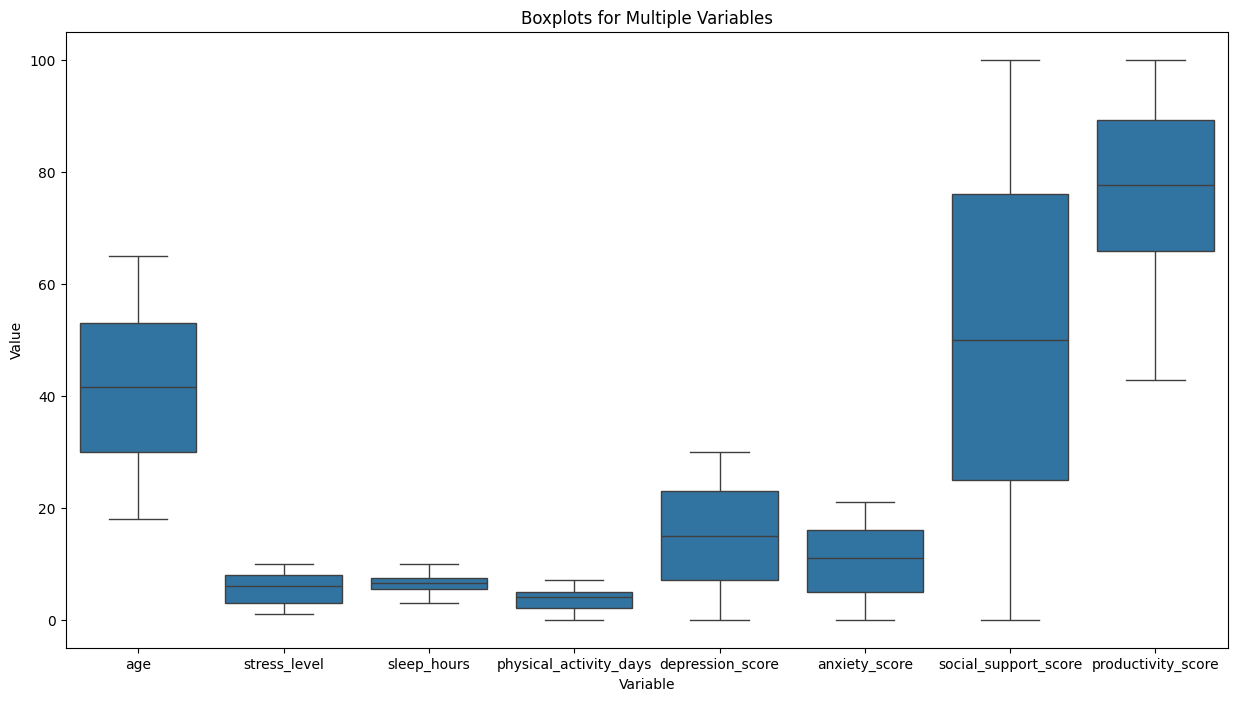

In [20]:
# Visualise Outliers using Box plot for all number variables

# Selecting the numerical columns
selected_cols = ['age', 'stress_level', 'sleep_hours', 'physical_activity_days', 'depression_score', 'anxiety_score', 'social_support_score', 'productivity_score']
melted_df = mh_df[selected_cols].melt(var_name='Variable', value_name='Value')

# Plotting it
plt.figure(figsize=(15, 8))
sns.boxplot(x='Variable', y='Value', data=melted_df)
plt.title("Boxplots for Multiple Variables")
plt.savefig('boxplot_for_multiple_variables.png')
plt.show()

In [21]:
# Encoding the ordinal values in the "mental_health_risk" variable with numbers for future spearman correlation analysis

# The mapping defined
risk_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
mh_df['mental_health_risk_encoded'] = mh_df['mental_health_risk'].map(risk_mapping)
mh_df.to_csv('encoded_dataset.csv', index=False)
print(mh_df[['mental_health_risk', 'mental_health_risk_encoded']].head(10))

  mental_health_risk  mental_health_risk_encoded
0               High                           3
1               High                           3
2             Medium                           2
3                Low                           1
4               High                           3
5             Medium                           2
6             Medium                           2
7             Medium                           2
8             Medium                           2
9             Medium                           2
